In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

Thu Nov 13 11:25:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import cv2
#image data generator is to package to label all the image & it will automatically label all the image

In [5]:
img = image.load_img("/content/drive/MyDrive/Colab Notebooks/training/happy /happy3.59.30.jpeg")

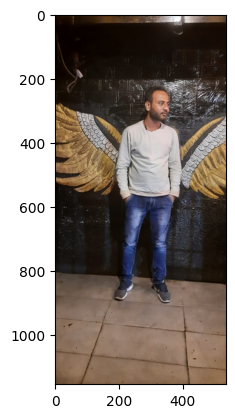

In [6]:
plt.imshow(img)

In [7]:
i1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/training/happy /happy3.59.30.jpeg")
i1
# 3 dimension matrix are created for the image
#the value ranges from 0- 255

array([[[  4,  12,  29],
        [  3,  11,  28],
        [  3,  11,  28],
        ...,
        [ 44,  68,  88],
        [ 43,  67,  87],
        [ 42,  66,  86]],

       [[  4,  12,  29],
        [  3,  11,  28],
        [  3,  11,  28],
        ...,
        [ 46,  70,  90],
        [ 44,  68,  88],
        [ 42,  66,  86]],

       [[  3,  11,  28],
        [  3,  11,  28],
        [  2,  10,  27],
        ...,
        [ 51,  74,  96],
        [ 47,  70,  92],
        [ 44,  67,  89]],

       ...,

       [[ 44,  69,  95],
        [ 47,  72,  98],
        [ 49,  74, 100],
        ...,
        [ 76, 104, 139],
        [ 76, 104, 139],
        [ 75, 103, 138]],

       [[ 43,  68,  94],
        [ 45,  70,  96],
        [ 47,  72,  98],
        ...,
        [ 75, 103, 138],
        [ 74, 102, 137],
        [ 73, 101, 136]],

       [[ 42,  67,  93],
        [ 44,  69,  95],
        [ 46,  71,  97],
        ...,
        [ 73, 101, 136],
        [ 73, 101, 136],
        [ 72, 100, 135]]

In [8]:
i1.shape
#shape of your image, height, weight, rgb


(1156, 534, 3)

In [9]:
train = ImageDataGenerator(rescale=1/200)
validation = ImageDataGenerator(rescale=1/200)
#to scale all the image i need to divine with 255
# we need to resize the image using 200 , 200 pixel

In [11]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/training",
                                          target_size = (200, 200),
                                          batch_size = 32,
                                          class_mode = "binary")
ideation_dataset = validation.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/validation",
                                          target_size = (200, 200),
                                          batch_size = 32,
                                          class_mode = "binary")



Found 12 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [12]:
train_dataset.class_indices

{'happy ': 0, 'not happy': 1}

In [13]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [14]:
# now we are applying maxpooling

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(loss = 'binary_crossentropy',
                  optimizer =tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  metrics = ['accuracy']
            )

In [16]:
model_fit = model.fit(train_dataset,epochs = 15)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.7013
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.5000 - loss: 3.2840
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.5000 - loss: 4.5251
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.6667 - loss: 0.6476
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.5000 - loss: 0.9056
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.5833 - loss: 0.6413
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.5833 - loss: 0.6002
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8333 - loss: 0.5353
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.5833 - loss: 0.5022
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.6667 - loss: 0.5474
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.5833 - loss: 0.4904
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.9167 - loss:

In [19]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/testing'

for i in os.listdir(dir_path ):
  print (i)

happy3.59.30.jpeg
happy 1.59.36.jpeg
sad2.59.33.jpeg
sad1.59.32.jpeg
happy2.59.27.jpeg
sad3.59.33.jpeg


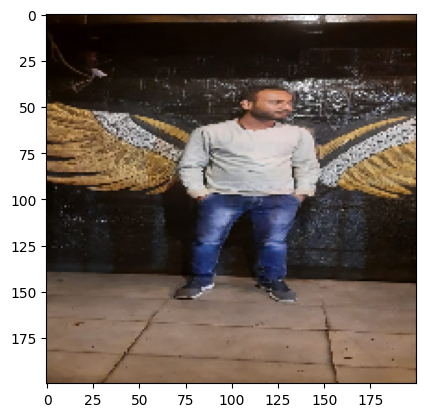

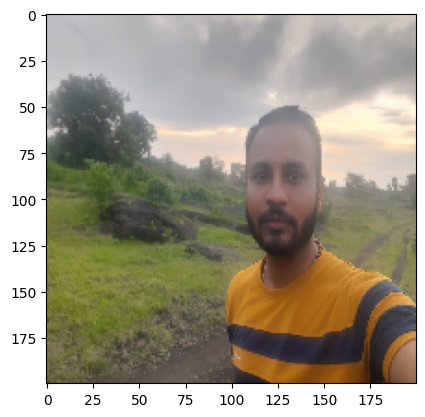

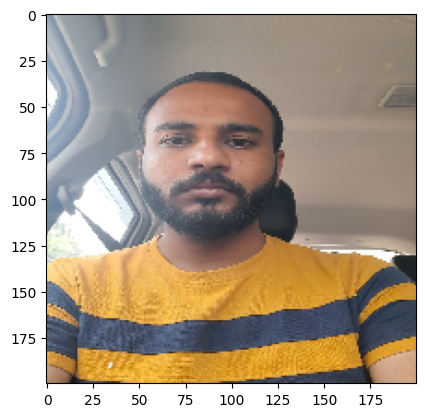

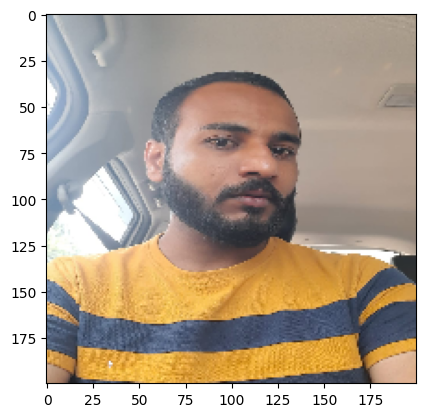

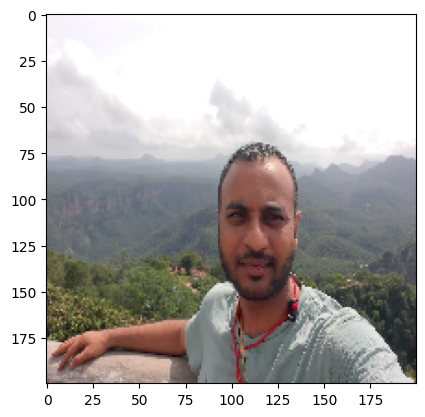

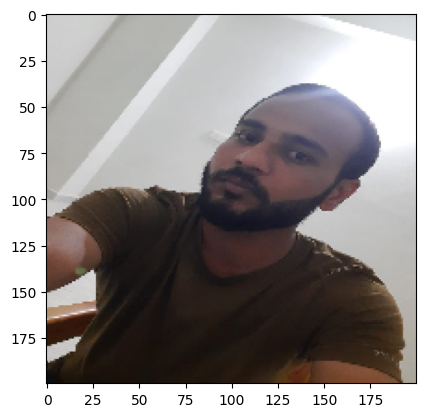

In [20]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/testing'

for i in os.listdir(dir_path ):
  img = image.load_img(dir_path+ '//'+i,target_size = (200, 200))
  plt.imshow(img)
  plt.show()

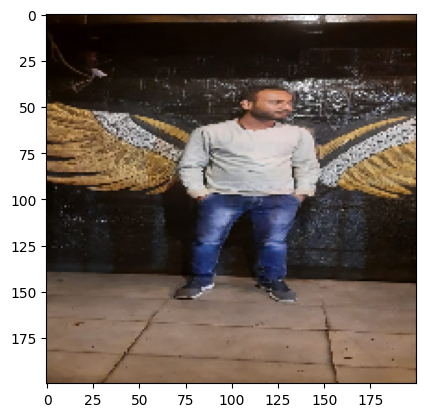

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
i am happy


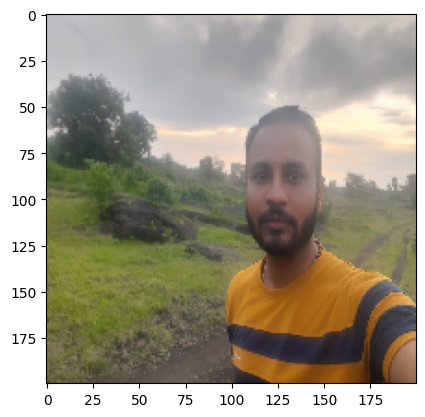

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
i am happy


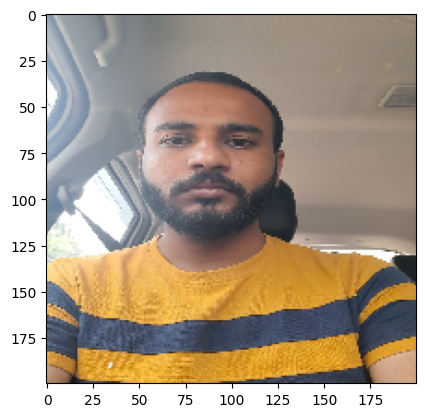

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
i am not happy


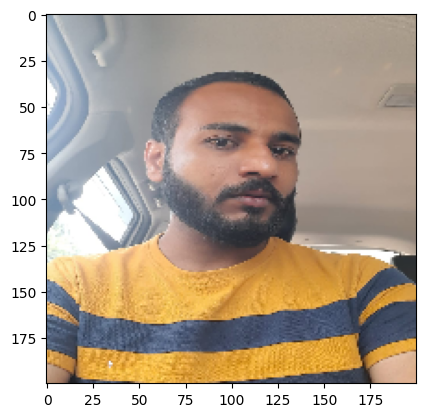

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
i am not happy


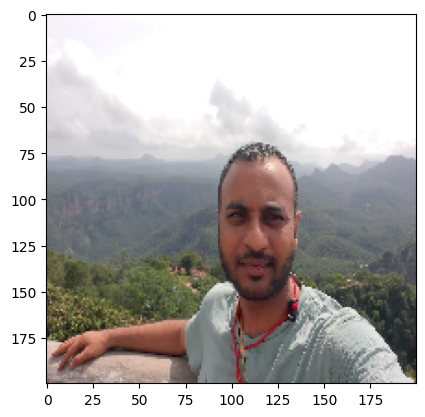

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
i am happy


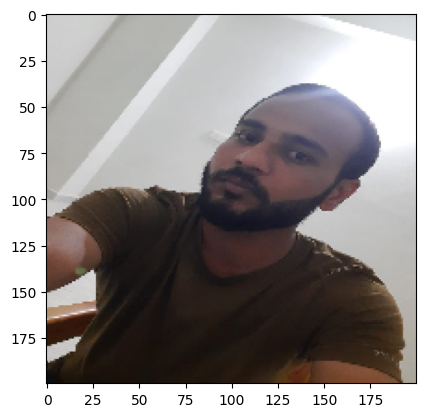

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
i am not happy


In [21]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    val = model.predict(images)
    if val == 0:
        print( 'i am happy')
    else:
        print('i am not happy')

In [22]:
!nvidia-smi

Thu Nov 13 12:48:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P0             27W /   70W |    1146MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----